In [55]:
PRFX='Mel0806D1'

In [56]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score as roc_auc
import os, random, torch

p_out = f'../output/{PRFX}'
# !ls $p_out

class Param: pass

!ls | grep {PRFX}

res = pickle.load(open(f'{p_out}/results_{PRFX}.p', 'rb'))
param = res['param']
display(param.__dict__)
p_prp = f'../output/{param.PRFX_PREP}'
dftrn = pd.read_csv(f'{p_prp}/train_all_dedup.csv') 

fld2stats=res['fld2stats']
fld2trvl=res['fld2trvl']
for fld,stats in fld2stats.items():
    print(f"best_scr: {stats['best_scr']:.3f}; best_epc: {stats['best_epc']};")
    

Mel0806D1__PSDMelInfEsmb0801A1__B3SZ384.ipynb


{'PRFX': 'Mel0806D1',
 'PRFX_PSD': 'MelInfEsmb0801A1',
 'PRFX_B4': None,
 'ARCH': 'efficientnet-b3',
 'SZ': 384,
 'PRFX_PREP': 'MelPrp0909B384',
 'LASTM': 3,
 'BS': 48,
 'SEED': 101,
 'EPOCHS': 10,
 'K': 4,
 'FLDS2USE': range(0, 4),
 'FP16': True,
 'RandomResizedCrop_scale': (0.75, 1.0),
 'LR': 0.0005,
 'WD': 0,
 'N_SAMPL': None,
 'DEBUG': False}

best_scr: 0.924; best_epc: 9;
best_scr: 0.930; best_epc: 7;
best_scr: 0.927; best_epc: 6;


3
4


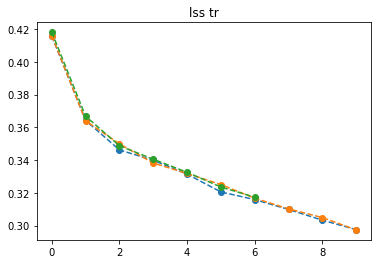

3
4


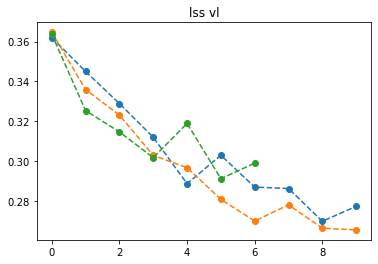

3
4


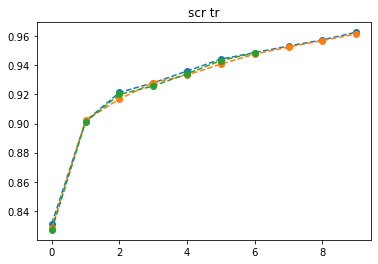

3
4


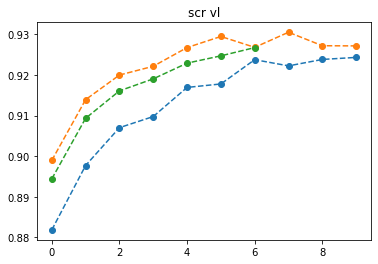

In [57]:
for mtrc in ['lss', 'scr']:
    for k in ['tr','vl',]:
        plt.title(f'{mtrc} {k}')
        for fld in range(5):
            try:
                plt.plot(fld2stats[fld][mtrc][k], 'o--')
            except KeyError as e:
                print(e)
        plt.show()

## best epc

In [58]:
vls=[]
oofs=[]
for fld in range(5):
    try:
        ep2oof = pickle.load(open(f'{p_out}/ep2oof_{PRFX}_fld_{fld}.p', 'rb'))
        if len(ep2oof)<param.EPOCHS: break
        _,vl= res['fld2trvl'][fld]
        vls += list(vl)
        best_epc=fld2stats[fld]['best_epc']
        oof = ep2oof[best_epc].mean(1)
        oofs += list(oof)
        print('fld', fld)
    except:
        pass
if len(oofs):
    print('oof', roc_auc(dftrn.target.iloc[vls], oofs))

fld 0
fld 1
oof 0.9273865727194245


In [59]:
idx20 = set(np.where(dftrn.source==20)[0])
idx=[]
prds=[]
for ind,prd in zip(vls, oofs):
    if ind in idx20: 
        idx.append(ind)
        prds.append(prd)
if len(oofs):
    print('oof20', roc_auc(dftrn.target.iloc[idx], prds))

oof20 0.9102386995658747


## last m

In [60]:
vls=[]
oofs=[]
for fld in range(5):
    try:
        ep2oof = pickle.load(open(f'{p_out}/ep2oof_{PRFX}_fld_{fld}.p', 'rb'))
        if len(ep2oof)<param.EPOCHS: break
        _,vl= res['fld2trvl'][fld]
        vls += list(vl)
        ep2oof = np.concatenate(ep2oof, 1)
        oof = ep2oof[:,-param.LASTM:].mean(1)
#         oof = ep2oof[:,-3:].mean(1)
        oofs += list(oof)
        print('fld', fld)
    except FileNotFoundError:
        pass
if len(oofs):
    print('oof', roc_auc(dftrn.target.iloc[vls], oofs))

fld 0
fld 1
oof 0.9278347703821057


In [61]:
idx20 = set(np.where(dftrn.source==20)[0])
idx=[]
prds=[]
for ind,prd in zip(vls, oofs):
    if ind in idx20: 
        idx.append(ind)
        prds.append(prd)
if len(oofs):
    print('oof20', roc_auc(dftrn.target.iloc[idx], prds))

oof20 0.9102487056487805
